In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
df=pd.read_csv('banking.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [5]:
df['education']=np.where (df['education']=='basic.9y','Basic',df['education'])
df['education']=np.where (df['education']=='basic.6y','Basic',df['education'])
df['education']=np.where (df['education']=='basic.4y','Basic',df['education'])

In [6]:
df['education'].nunique()

6

In [7]:
df.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [8]:
df.groupby("y").min()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,,,,,,,,,,
0,17,admin.,divorced,Basic,no,no,no,cellular,apr,fri,0,1,0,0,failure,-3.4,92.201,-50.8,0.634,4963.6
1,17,admin.,divorced,Basic,no,no,no,cellular,apr,fri,37,1,0,0,failure,-3.4,92.201,-50.8,0.634,4963.6


In [9]:
#EDA on job, marital status

In [10]:
dt=df.dtypes # checking datatypes of all columns
dt

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [11]:
df.isnull().sum() #checking null values


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [12]:
df.describe(include=['number'])

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [13]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,6,3,3,3,2,10,5,3
top,admin.,married,Basic,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12513,32588,21576,33950,26144,13769,8623,35563


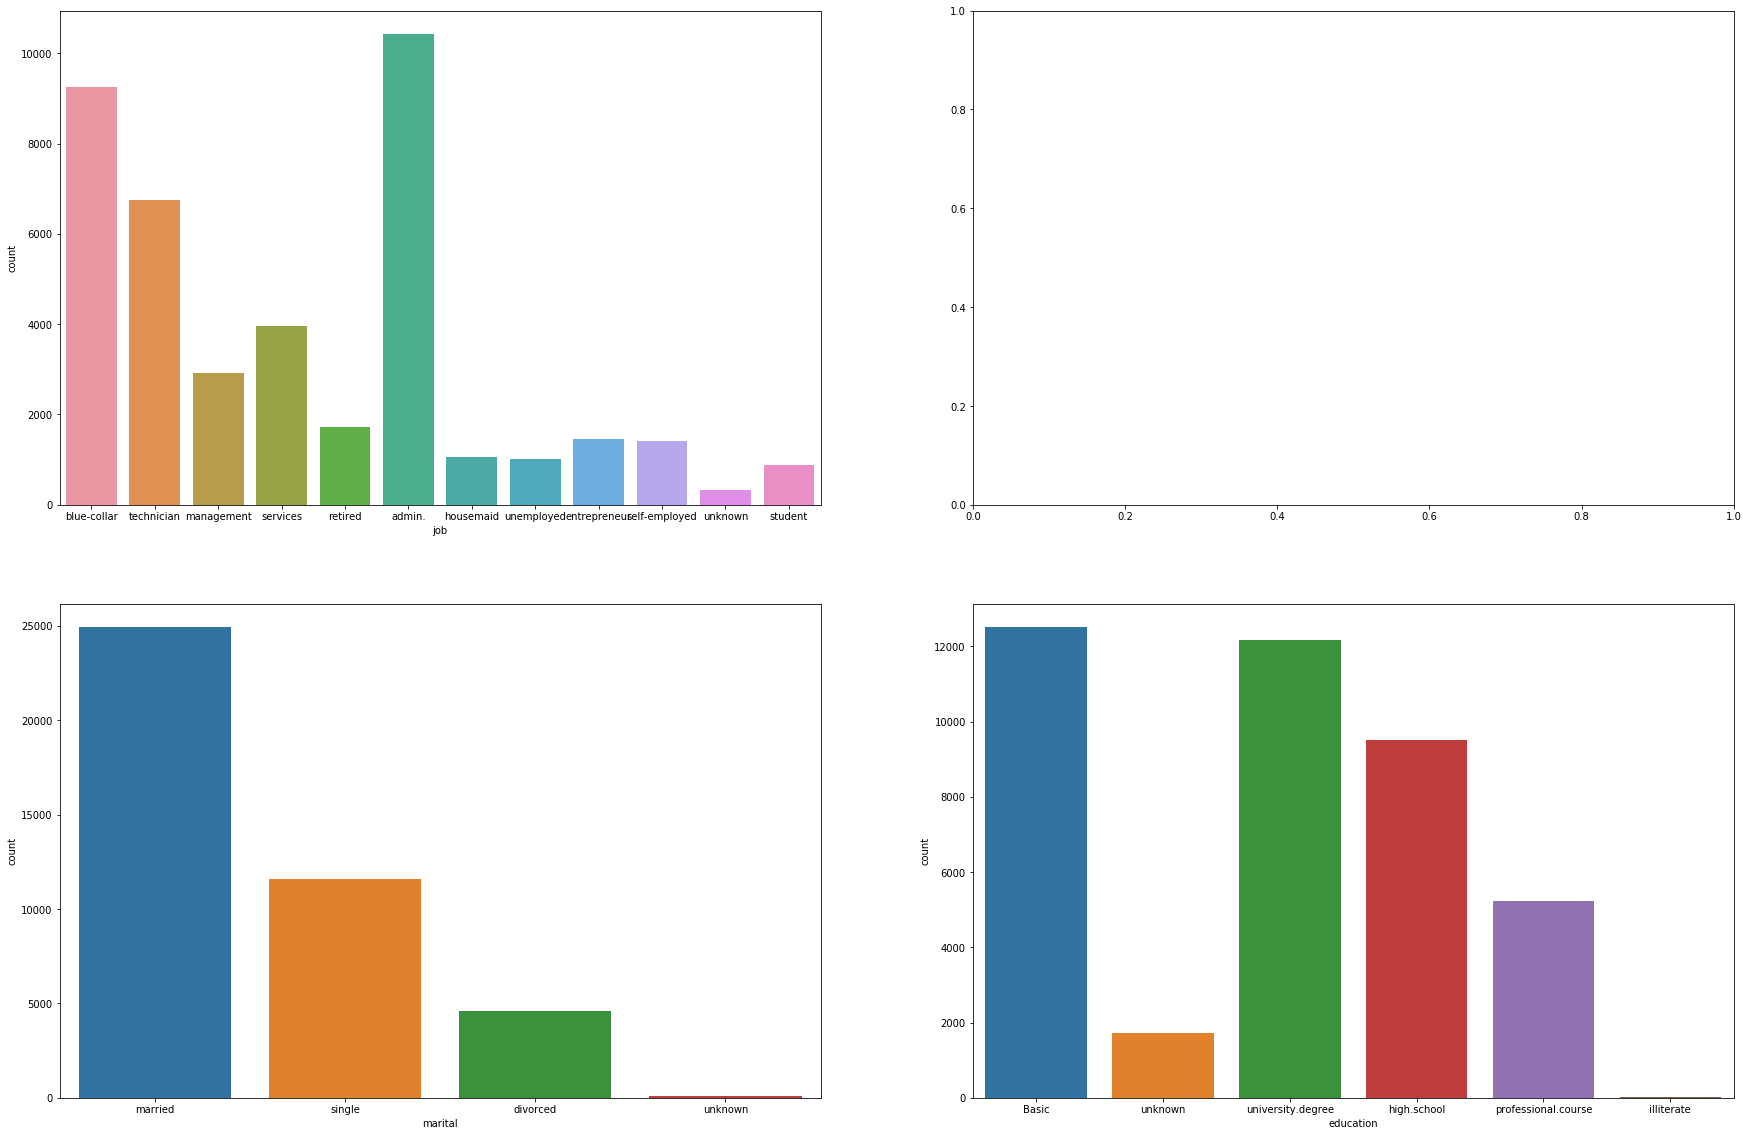

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
sns.countplot('job',data=df,ax=axes[0,0])

sns.countplot('marital',data=df,ax=axes[1,0])
sns.countplot('education',data=df,ax=axes[1,1])

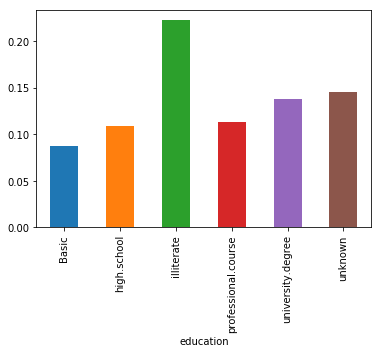

In [15]:

df.groupby('education').mean()['y'].plot(kind='bar')


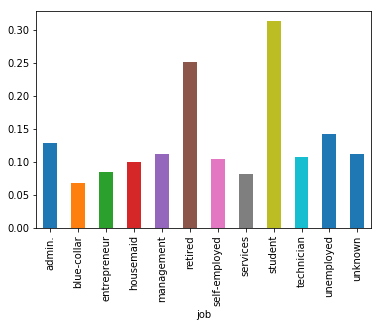

In [16]:
df.groupby('job')['y'].mean().plot(kind='bar')


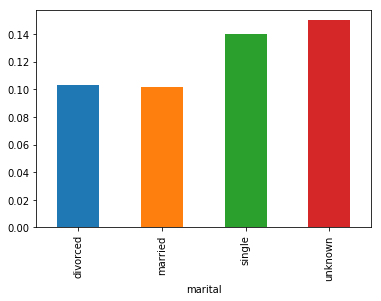

In [17]:
df.groupby('marital')['y'].mean().plot(kind='bar')

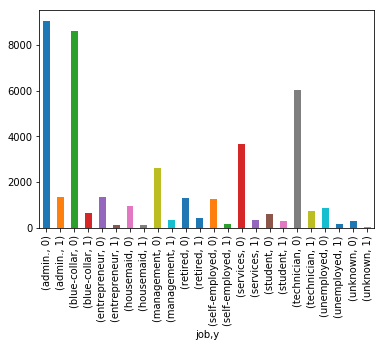

In [18]:
df.groupby('job').y.value_counts().plot(kind='bar')

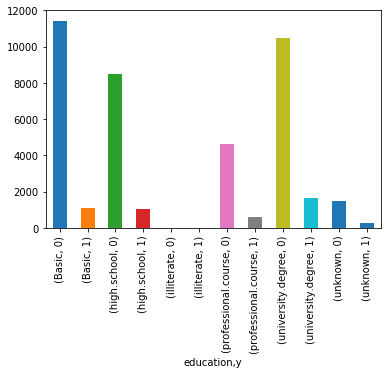

In [19]:
df.groupby('education').y.value_counts().plot(kind='bar')

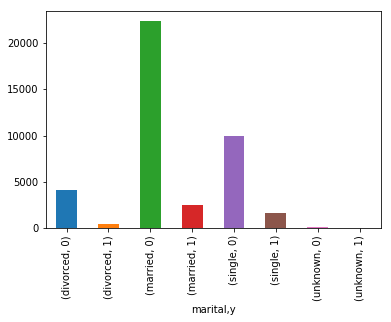

In [20]:
df.groupby('marital').y.value_counts().plot(kind='bar')

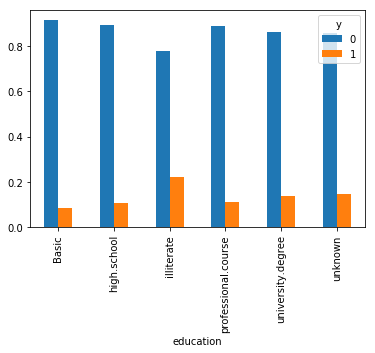

In [21]:
pd.crosstab(df.education,df.y,normalize='index').plot(kind='bar')

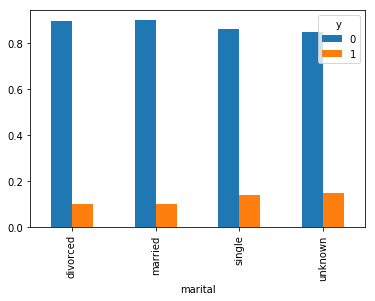

In [22]:
pd.crosstab(df.marital,df.y,normalize='index').plot(kind='bar')

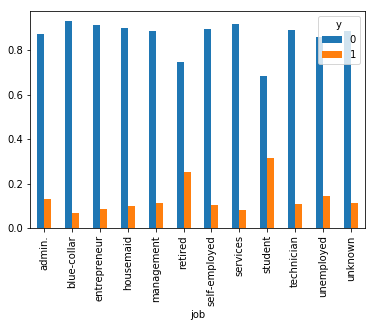

In [23]:
pd.crosstab(df.job,df.y,normalize='index').plot(kind='bar')

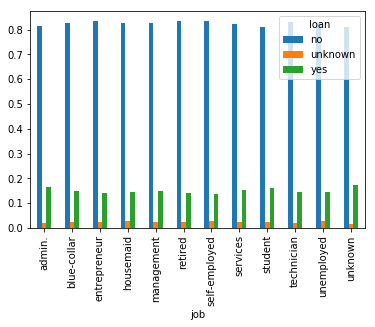

In [24]:
pd.crosstab(df.job,df.loan,normalize='index').plot(kind='bar')

In [25]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [26]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [27]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [28]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
   cat_list='var'+'_'+var
   cat_list = pd.get_dummies(df[var], prefix=var)
   data1=df.join(cat_list)
   df=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [30]:
#feature engineering & recursive feature engineering

In [31]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [32]:
logreg=LogisticRegression()

In [33]:
rfe=RFE(logreg,18) # 18 are the no. of attributes we are selecting at this moment

In [34]:
data_final=df[to_keep]
data_final.columns.values


array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [35]:

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [36]:
rfe = rfe.fit(data_final[X], data_final[y]) 

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


62

In [37]:
print(rfe.support_) 
print(rfe.ranking_)                 #gives ranking posn. of ith feature

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True False False False
  True  True  True False False False  True False False  True  True  True
  True]
[35 33 12 40  1 13 17 16  1 27 11  1 24 39 42  1 31  1  1 19 21 41  2  3
  4 43  6  7 38  8 10 15  1 14 44 36 29 37 20 30 28 23  1  1  1 18 22 25
  1  1  1 32  5  9  1 34 26  1  1  1  1]
